In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Thin walled pressure vessel 
Physics forum example

In [45]:
E = 69 * 1_000
r0 = 1
t0 = 0.001
#r = np.arange(0.01, 0.1, 0.001)
r = np.arange(1, 10, 0.1)
# print(r)

In [46]:
s = r/r0 - 1
# print(s)

In [47]:
P = 2 * E * (r - r0) * t0 * r0 / r**3
# print(P)

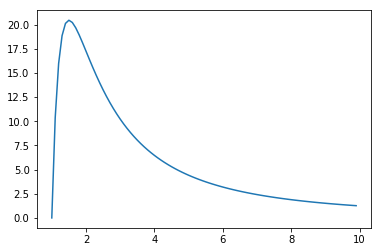

In [48]:
# s = r/r0
plt.plot(s + 1, P)

Lecture notes example 

In [49]:
E = 69 * 1_000
r0 = 1
t0 = 0.001
#r = np.arange(0.01, 0.1, 0.001)
r = np.arange(1, 10, 0.1)
#P = 4 * E * (r - r0) * t0 / r**2
P = 4 * E * (r - r0) * t0 / r**2

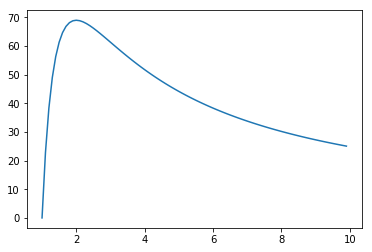

In [50]:
#plt.plot(s + 1, P)
plt.plot(r, P)

In [51]:
from sympy import solve, symbols, Symbol, Function, Eq, pprint 
a,b,c,d,e = symbols('a,b,c,d,e')
#a, b, c, x = symbols('a, b, c, x')
a = (b+c*d)/e
#l = a
r = solve(a,d)
#l = d
r



[-b/c]

Re-arranging functions with sympy

https://stackoverflow.com/questions/50284390/rearranging-and-solving-an-equation-in-python

In [52]:
import numpy as np
import sympy
a,b,c,d,e = sympy.symbols('a,b,c,d,e')


In [53]:
aexpr = (b+c*d)/e
aeq = sympy.Eq(a, aexpr)


In [54]:
sympy.pprint(aeq)


    b + c⋅d
a = ───────
       e   


In [59]:
bexpr = sympy.solve(aeq, b)[0]
bexpr


a*e - c*d

In [60]:
beq = sympy.Eq(b, bexpr)
sympy.pprint(bexpr)


a⋅e - c⋅d


## Thick spherical pressure vessel

http://mms2.ensmp.fr/emms_paris/plasticite3D/exercices/eSpherePress.pdf

http://solidmechanics.org/text/Chapter4_1/Chapter4_1.htm#Sect4_1_4

<img src="img/thick_shell.png" alt="Drawing" style="width: 400px;"/> 

<img src="img/thick_shell_eqtn.png" alt="Drawing" style="width: 400px;"/> 

<img src="img/thick_shell_val_subs.png" alt="Drawing" style="width: 400px;"/> 

Radius r replaced with bfinal (final outer diameter ofthe shell) as this is the radius we are concerned with. 


In [61]:
ai, af, bi, bf, v , E , P , P_= sympy.symbols('ai, af, bi, bf, v , E , P, P_')
# ai = inner radius, initial
# af = inner radius, final
# bi= outer radius, initial
# bf = outer radius, final
# v = poisson ratio (0.5 for ruber)
# E = Youngs moduls
# P = internal pressure 

                ⎛                       1.0⎞                  -1.0
                ⎜  3   ⎛  3     3     3⎞   ⎟ ⎛  3     3     3⎞    
    E⋅(bf - bi)⋅⎝bf  - ⎝ai  + bf  - bi ⎠   ⎠⋅⎝ai  + bf  - bi ⎠    
P = ──────────────────────────────────────────────────────────────
                                      bf⋅(v + 1)                  
                      bf⋅(-2⋅v + 1) + ──────────                  
                                          2                       


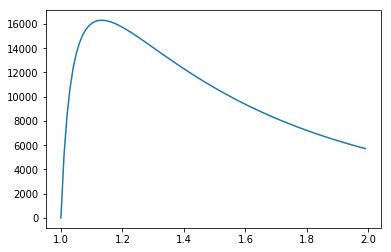

In [62]:
r = np.arange(1, 10, 0.1)
af = (bf**3 - bi**3 + ai**3) ** (1./3)
P_expr = E * ((bf**3 - af**3) / af**3) * 1/( (1 - 2*v) * bf + (1 + v) * bf**3 / (2*bf**2) ) * (bf - bi)
P_eq = sympy.Eq(P, P_expr)
sympy.pprint(P_eq)

rads = []
pressures = []

for r in range(0, 100):
    rad_init = 1
    delta_r = r/100
    rad_fin = rad_init + delta_r
    rads.append(1 + delta_r)
    pressures.append(P_expr.subs(E, 69 * 1_000).subs(ai,0.5).subs(bi, rad_init).subs(bf, rad_fin).subs(v, 0.5))
    
    
plt.plot(rads, pressures)

In [63]:
P_expr.subs(E, 3.48e-6).subs(ai,12700).subs(bi, 8031).subs(bf, r).subs(v, 1000+273)

-1.46132935746951e-7

In [64]:
bf_expr = (af**3 / (bf**3 - af**3)) * ( (1 - 2*v) * bf + (1 + v) * bf**3 / (2*bf**2) ) * (P/E) + bi
bf_eq = sympy.Eq(bf, bf_expr)
sympy.pprint(bf_eq)

                                                          1.0
            ⎛                bf⋅(v + 1)⎞ ⎛  3     3     3⎞   
          P⋅⎜bf⋅(-2⋅v + 1) + ──────────⎟⋅⎝ai  + bf  - bi ⎠   
            ⎝                    2     ⎠                     
bf = bi + ───────────────────────────────────────────────────
                       ⎛                       1.0⎞          
                       ⎜  3   ⎛  3     3     3⎞   ⎟          
                     E⋅⎝bf  - ⎝ai  + bf  - bi ⎠   ⎠          


In [69]:
# re-arrange for P
P_expr = sympy.solve(bf_eq, P)[0]

In [66]:

#P_expr = 0.666666666666667*E*(ai**3*bf - ai**3*bi - bf*bi**3 + bi**4)/(bf*(ai**3*v - ai**3 + bf**3*v - bf**3 - bi**3*v + bi**3))



In [67]:
P_eq = sympy.Eq(P, P_expr)
sympy.pprint(P_eq)

                        ⎛  3        3           3     4⎞
    0.666666666666667⋅E⋅⎝ai ⋅bf - ai ⋅bi - bf⋅bi  + bi ⎠
P = ────────────────────────────────────────────────────
           ⎛  3       3     3       3     3       3⎞    
        bf⋅⎝ai ⋅v - ai  + bf ⋅v - bf  - bi ⋅v + bi ⎠    


In [68]:
8**(1/3)

2.0